In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
currentDirectory = os.getcwd()
os.chdir(os.path.dirname(currentDirectory))
from TDOA_estimation import GCC_PHAT

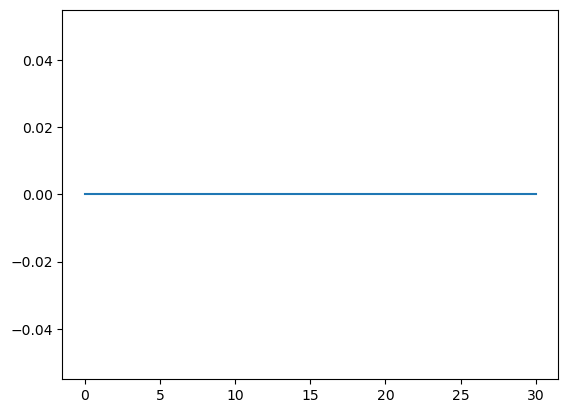

100 31
69


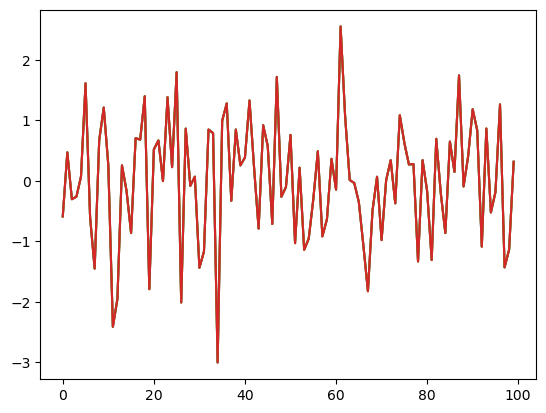

[16, 57, 49, 68]
(4, 100)
[0. 0. 0. 0. 0. 0.]


In [22]:
basesignal =  np.random.normal(0,1,100)

triangle = np.array([0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,0])
triangle = triangle * np.sin(2 * np.pi * np.arange(0,1,len(triangle) * 1000))
plt.plot(triangle)
plt.show()

print(len(basesignal),len(triangle))
padding_amount = len(basesignal) - len(triangle)
print(padding_amount)

padding_arr = []
dataMatrix = []
for i in range(4):
    padding = np.random.randint(0, padding_amount)
    padding_arr.append(padding)
    
    front_padding = np.zeros(padding)
    back_padding = np.zeros(padding_amount -padding)
    new_arr = np.concatenate((front_padding, triangle, back_padding))
    new_arr = new_arr + basesignal
    dataMatrix.append(new_arr)
    plt.plot(new_arr)
    #plt.plot(np.abs(np.fft.rfft(new_arr)))
plt.show()

print(padding_arr)

dataMatrix = np.array(dataMatrix)
print(dataMatrix.shape)
tdoas = GCC_PHAT(dataMatrix, 100000, 4, max_tau=None, interp=1)
print(tdoas)

In [19]:
sampleRate = 100000
duration = 0.5
offsets = [54,70,76]
pulseFrequency = 20000
numPulseCycles = 4
otherFreqs = [70,700,8000]
otherAmps = [.1,0.2,.1]
noiseScale = .01

signal1, signal2, signal3, signal4, trueTDOAs = GenerateSinPulses(sampleRate, duration, offsets, 
                                                                   pulseFrequency, numPulseCycles, 
                                                                   otherFreqs, otherAmps, noiseScale)


zoom = False # Set this value to true to zoom in on the pulses
plt.figure(figsize=(10,4))

startPoint = 0
endPoint = len(signal1)
if zoom:
    startPoint = 24500
    endPoint = 25500
    
plt.plot(signal1[startPoint:endPoint],c= 'b', label = "signal1")
plt.plot(signal2[startPoint:endPoint], c= 'r', label = "signal2")
plt.plot(signal3[startPoint:endPoint],c= 'g', label = "signal3")
plt.plot(signal4[startPoint:endPoint], c= 'y', label = "signal4")
plt.legend()
plt.show()

NameError: name 'GenerateSinPulses' is not defined

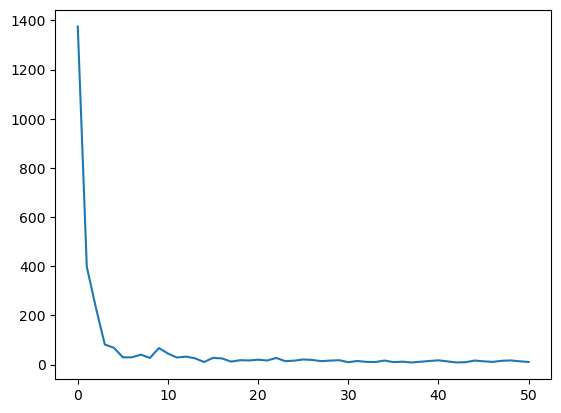

In [6]:
def f(x):
    y = 0
    result = []
    for _ in x:
        result.append(y)
        y += np.random.normal(scale=1)
    return np.array(result)


signal1 = f(np.arange(0,100))
plt.plot(np.abs(np.fft.rfft(signal1)))
plt.show()